In [ ]:
##Importing libraies 

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import math


In [77]:
## Data Exploratin and preprocessing, Basic statistics

In [17]:
df = pd.read_csv('country-data.csv')
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [18]:
df.tail(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900
159,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [19]:
df.shape

(167, 10)

In [20]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [21]:
df.country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [23]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [24]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [78]:
## Data Exploration: Visualisations 

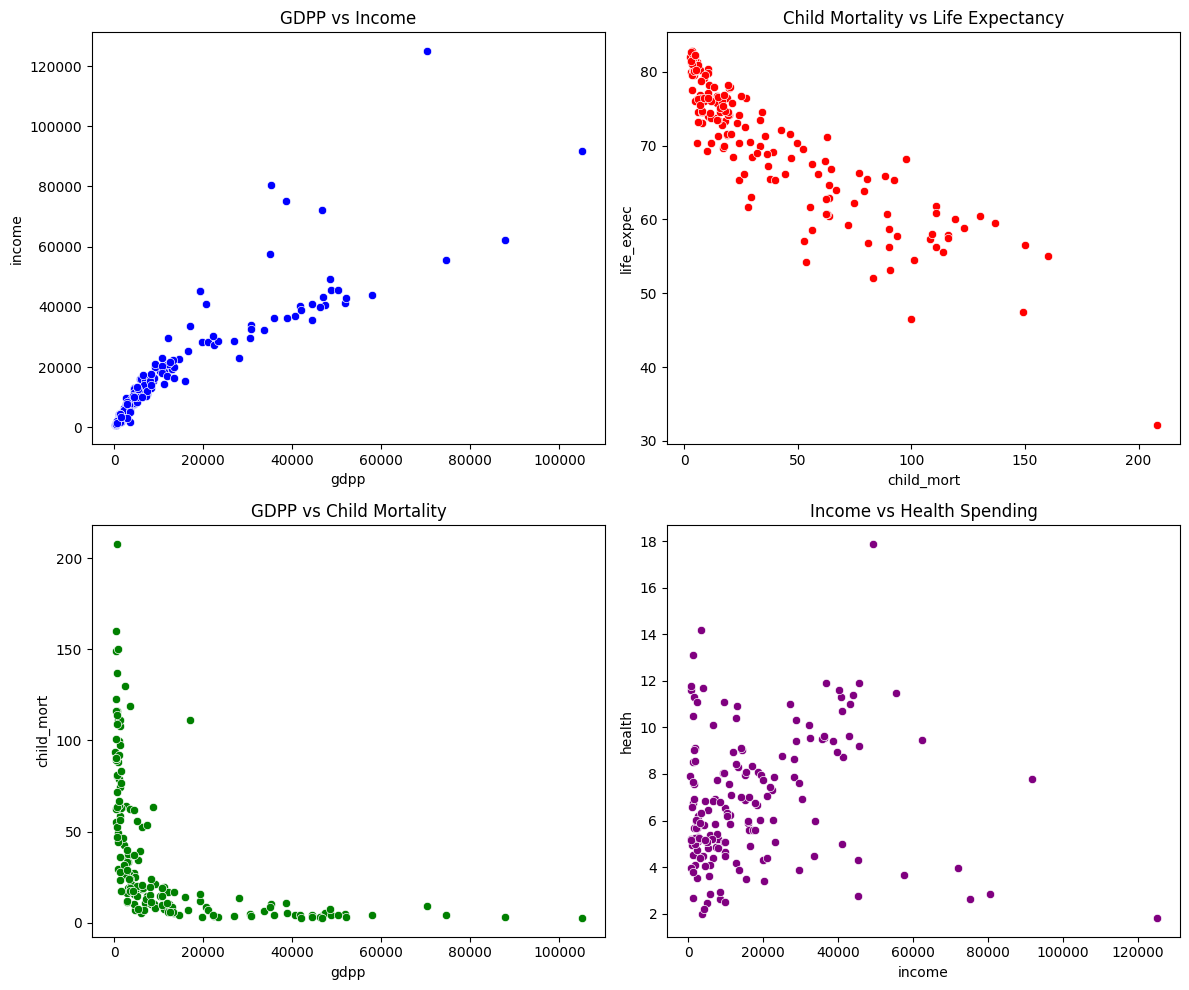

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# GDPP vs Income
sns.scatterplot(data=df, x="gdpp", y="income", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("GDPP vs Income")

# Child Mortality vs Life Expectancy
sns.scatterplot(data=df, x="child_mort", y="life_expec", ax=axes[0, 1], color="red")
axes[0, 1].set_title("Child Mortality vs Life Expectancy")

# GDPP vs Child Mortality
sns.scatterplot(data=df, x="gdpp", y="child_mort", ax=axes[1, 0], color="green")
axes[1, 0].set_title("GDPP vs Child Mortality")

# Income vs Health Spending
sns.scatterplot(data=df, x="income", y="health", ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Income vs Health Spending")

plt.tight_layout()
plt.show()

In [75]:
# Find country with min and max values for each numerical feature
numerical_features = [col for col in df.columns if col != 'country']

for col in numerical_features:
    min_row = df.loc[df[col].idxmin()]
    max_row = df.loc[df[col].idxmax()]
    print(f"Lowest {col}: {min_row['country']} ({min_row[col]})")
    print(f"Highest {col}: {max_row['country']} ({max_row[col]})\n")


Lowest child_mort: Iceland (2.6)
Highest child_mort: Haiti (208.0)

Lowest exports: Myanmar (0.109)
Highest exports: Singapore (200.0)

Lowest health: Qatar (1.81)
Highest health: United States (17.9)

Lowest imports: Myanmar (0.0659)
Highest imports: Singapore (174.0)

Lowest income: Congo, Dem. Rep. (609)
Highest income: Qatar (125000)

Lowest inflation: Seychelles (-4.21)
Highest inflation: Nigeria (104.0)

Lowest life_expec: Haiti (32.1)
Highest life_expec: Japan (82.8)

Lowest total_fer: Singapore (1.15)
Highest total_fer: Niger (7.49)

Lowest gdpp: Burundi (231)
Highest gdpp: Luxembourg (105000)

Lowest Cluster: Albania (0)
Highest Cluster: Afghanistan (2)



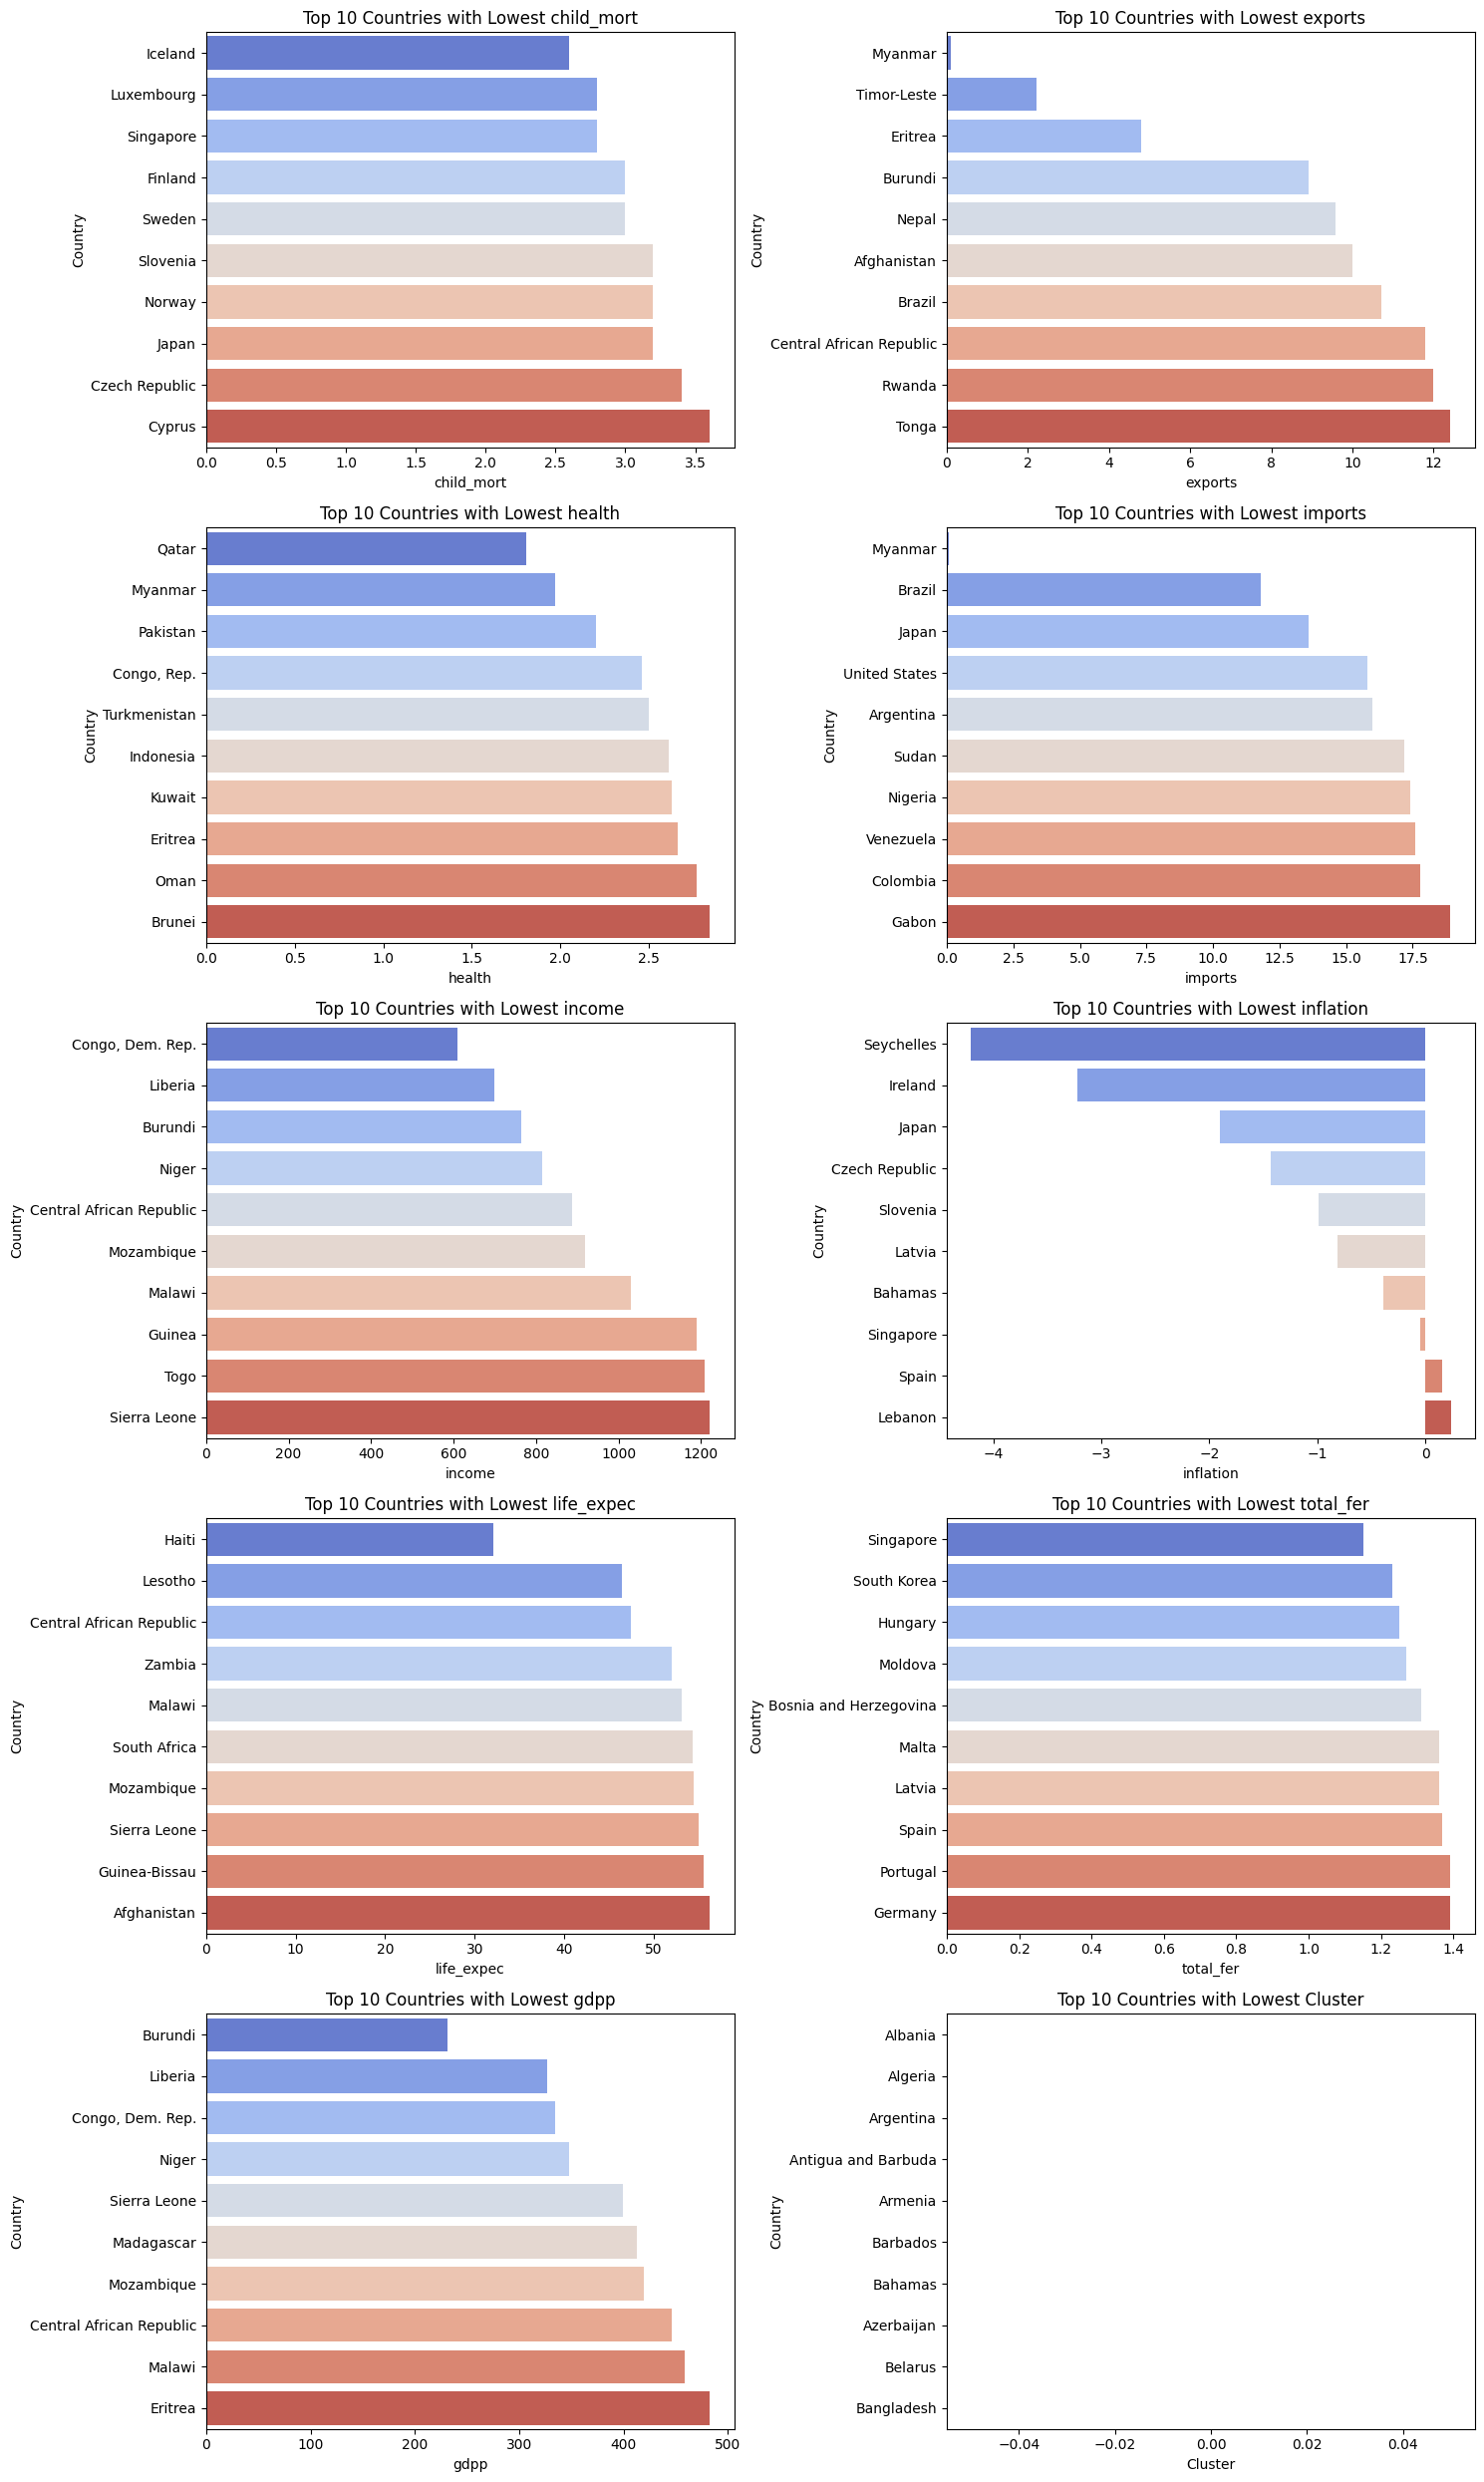

In [80]:
import math

num_features = len(numerical_features)
cols = 2  # number of plots per row
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i, col in enumerate(numerical_features):
    ax = axes[i // cols, i % cols]
    top_10 = df.sort_values(by=col).head(10)
    
    sns.barplot(x=col, y='country', data=top_10, hue='country', palette='coolwarm', legend=False, ax=ax, dodge=False)
    ax.set_title(f"Top 10 Countries with Lowest {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Country")

plt.tight_layout()
plt.show()


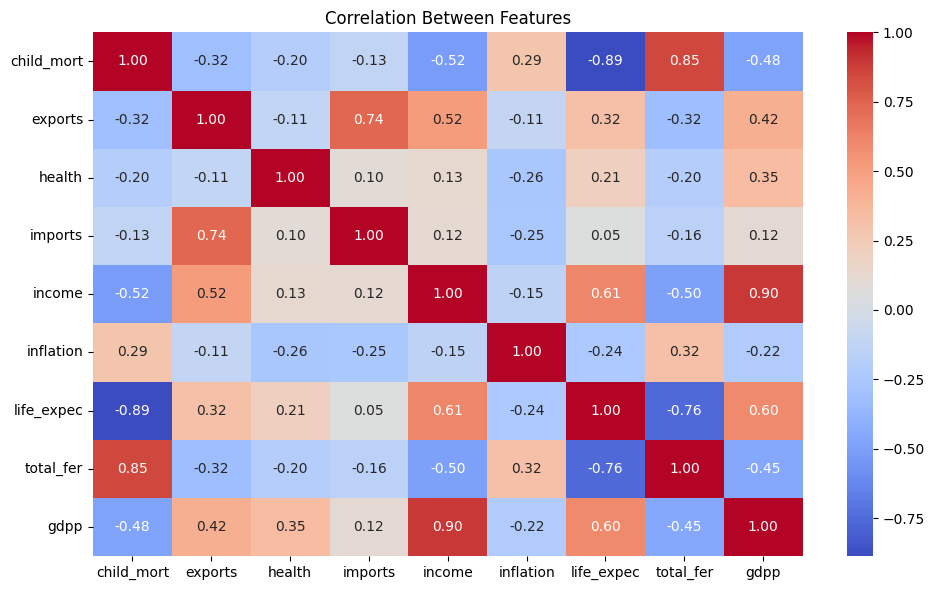

In [ ]:
## Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Features")
plt.tight_layout()
plt.show()


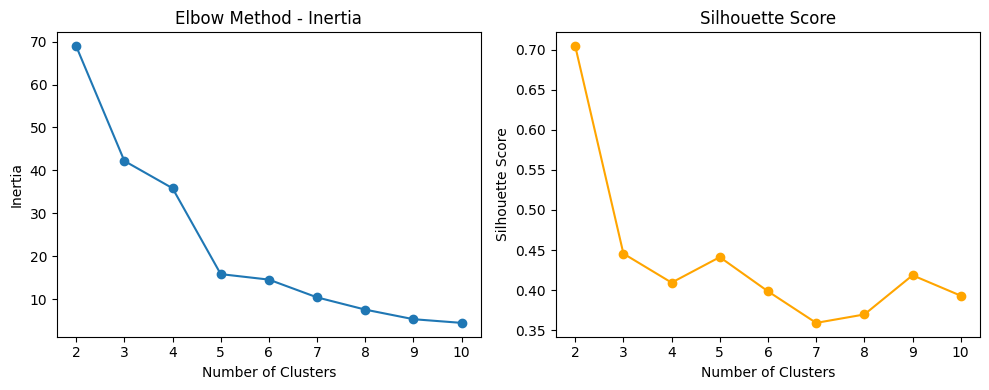

In [89]:
## Chosing the optimal number of clusters using the Elbow method and silhoutette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Elbow method
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

## Plot elbow curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method - Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K, silhouette, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()




         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0         22.456977  40.273128  6.251047  47.362394  12321.744186   7.720884   
1          5.000000  58.738889  8.807778  51.491667  45672.222222   2.671250   
2         95.106667  28.602444  6.301111  42.306667   3539.844444  11.986778   

         life_expec  total_fer          gdpp  Cluster  
Cluster                                                
0         72.566279   2.340349   6461.767442      0.0  
1         80.127778   1.752778  42494.444444      1.0  
2         59.055556   5.065333   1766.711111      2.0  


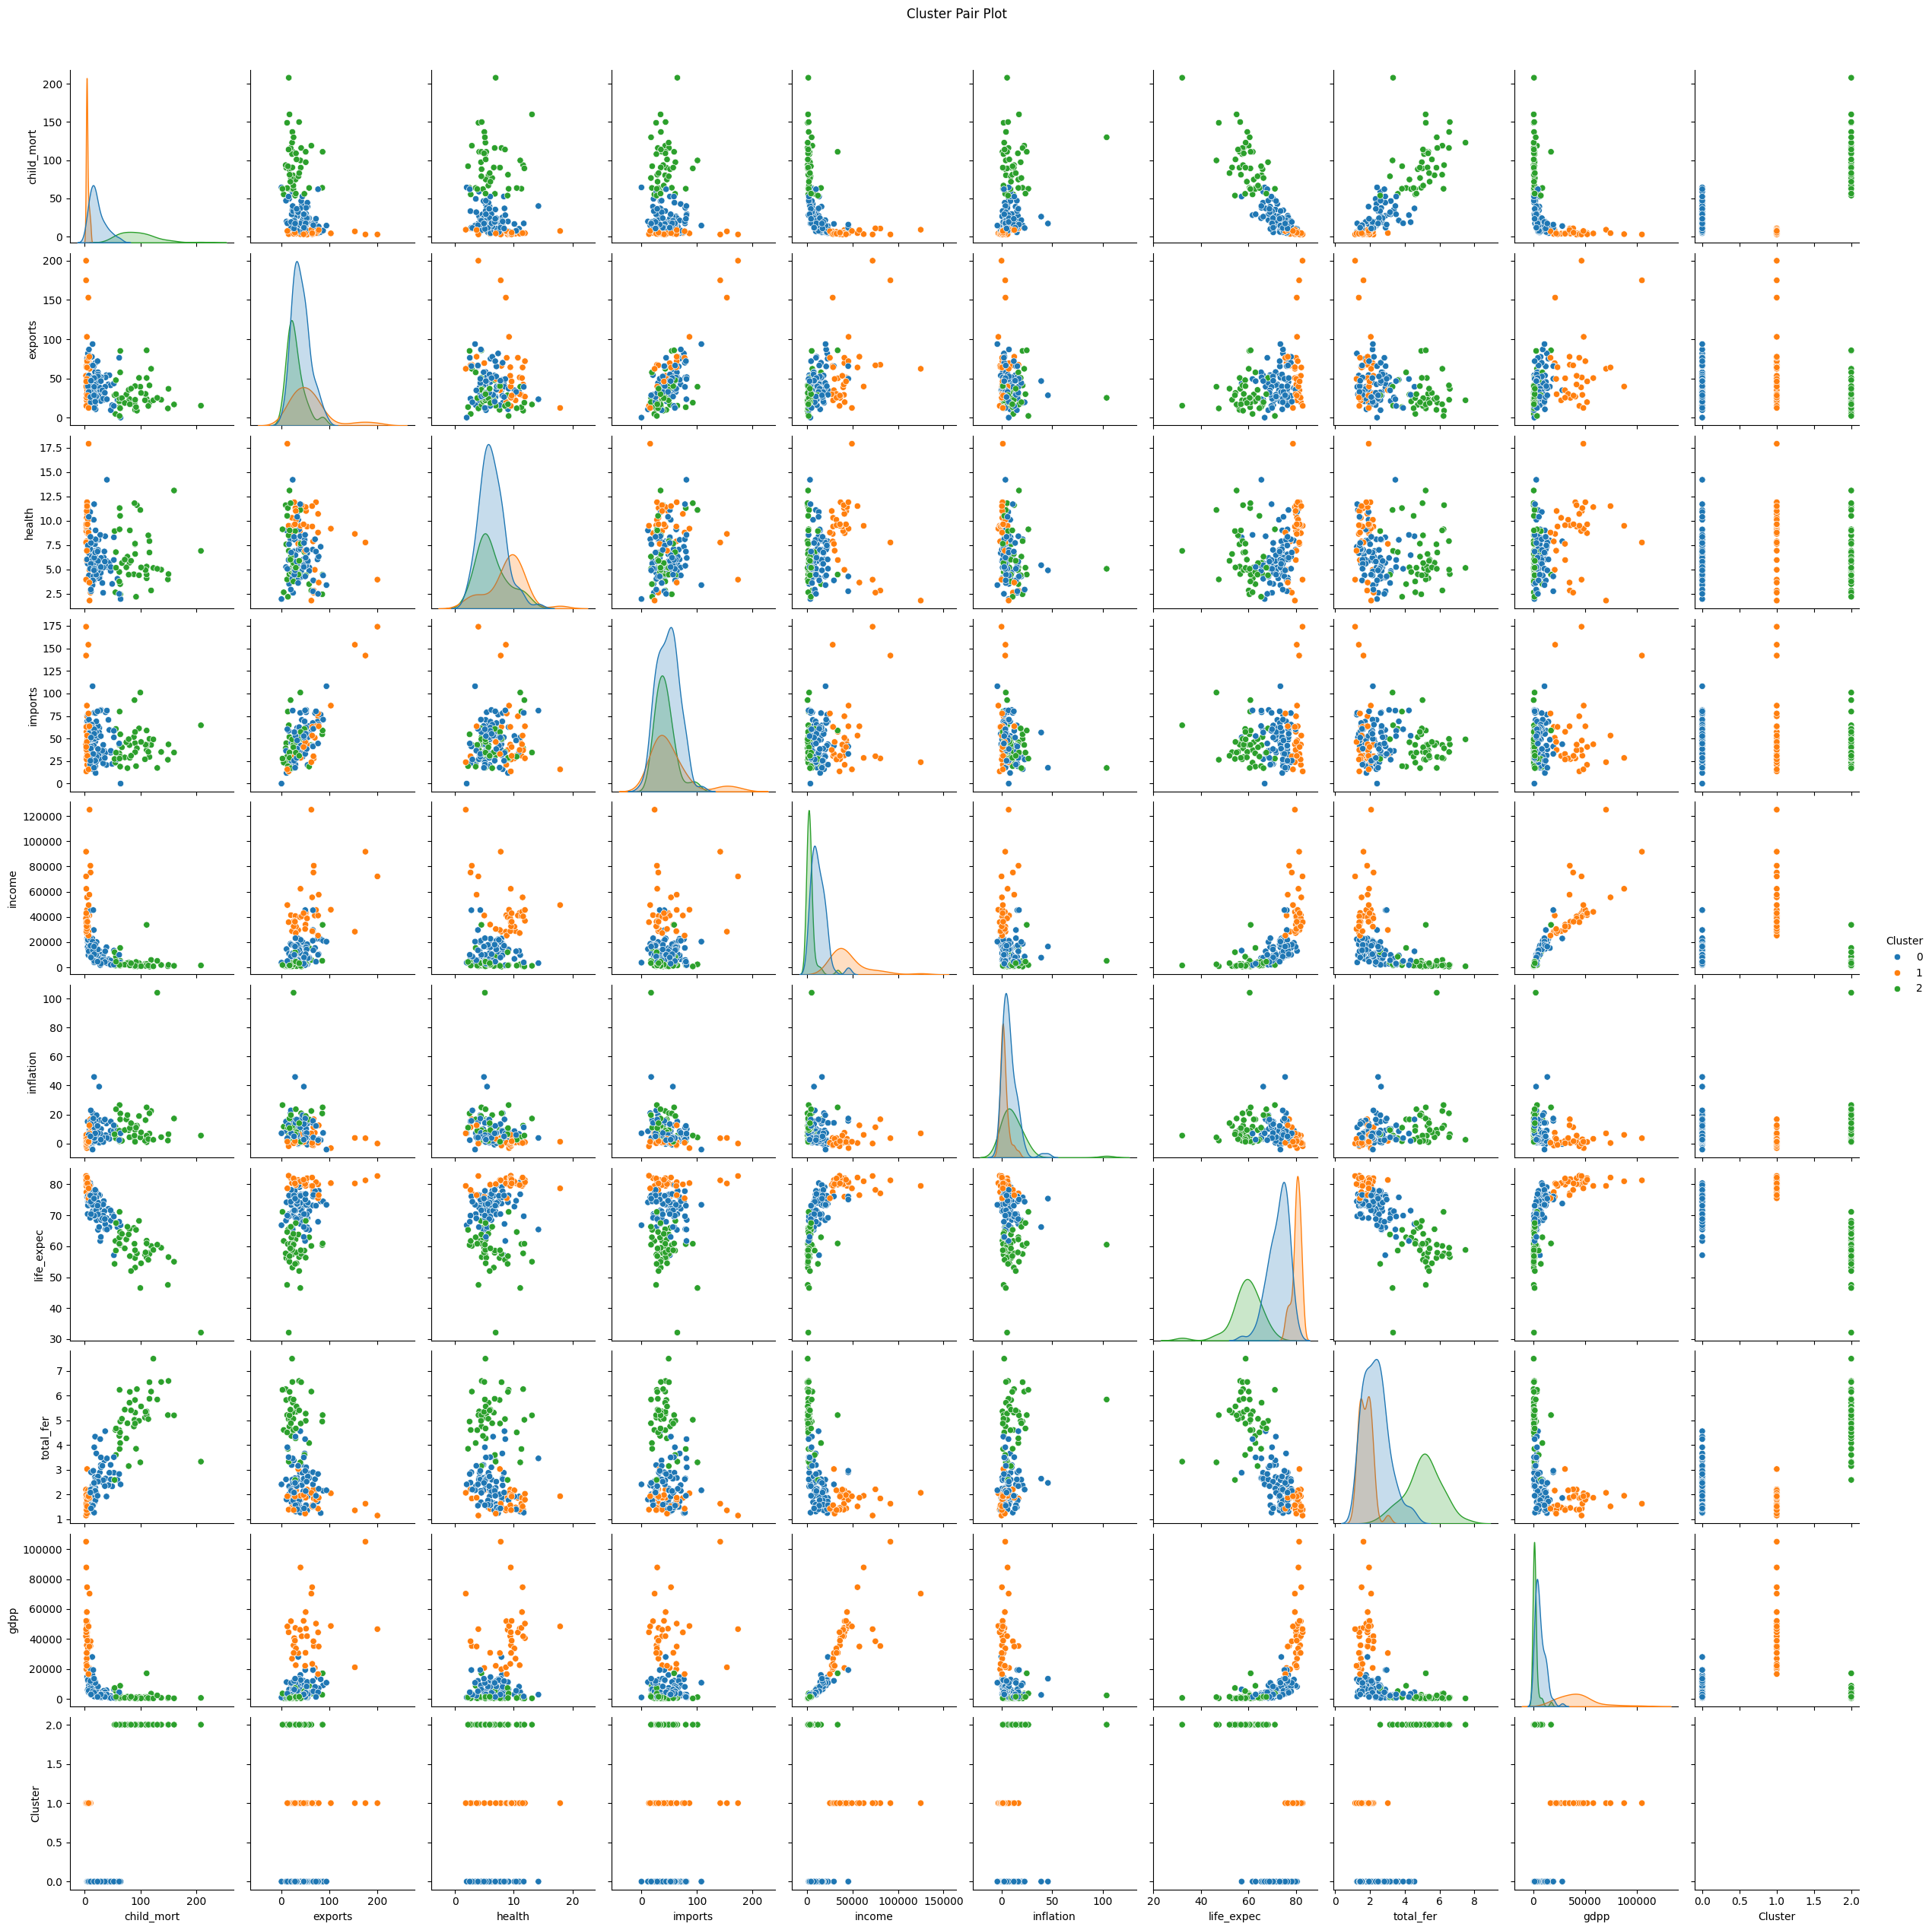

In [88]:
## Cluster summaries
cluster_summary = df.groupby('Cluster')[numerical_features].mean()
print(cluster_summary)

## Visualize clusters with pairplot
sns.pairplot(df, hue='Cluster', vars=numerical_features, palette='tab10')
plt.suptitle("Cluster Pair Plot", y=1.02)
plt.show()


In [87]:
## Find the cluster with the highest need (e.g. high child mortality, low income)
needy_cluster = cluster_summary['child_mort'].idxmax()
needy_countries = df[df['Cluster'] == needy_cluster]

## Show the top most needy countries
print("Countries most in need (based on clustering):")
print(needy_countries[['country', 'child_mort', 'income', 'gdpp']].sort_values(by='child_mort', ascending=False))

Countries most in need (based on clustering):
                      country  child_mort  income   gdpp
66                      Haiti       208.0    1500    662
132              Sierra Leone       160.0    1220    399
32                       Chad       150.0    1930    897
31   Central African Republic       149.0     888    446
97                       Mali       137.0    1870    708
113                   Nigeria       130.0    5150   2330
112                     Niger       123.0     814    348
3                      Angola       119.0    5900   3530
25               Burkina Faso       116.0    1430    575
37           Congo, Dem. Rep.       116.0     609    334
64              Guinea-Bissau       114.0    1390    547
49          Equatorial Guinea       111.0   33700  17100
40              Cote d'Ivoire       111.0    2690   1220
17                      Benin       111.0    1820    758
63                     Guinea       109.0    1190    648
28                   Cameroon       108.0 